## Bernoulli Naive Bayes (One-hot Encoding)

This notebook requires:
* trainOneHotEncoded.csv

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import json
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

### Import the Dataset

In [ ]:
train_df = pd.read_csv('trainOneHotEncoded.csv')
train_df.head()

,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,plain flour,...,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers,cuisine
0,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,greek
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,southern_us
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,filipino
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian


### Split the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(["cuisine"], axis = 1), 
                                                    train_df["cuisine"], 
                                                    random_state=42, 
                                                    test_size= 0.2)

### Train the Model

In [ ]:
nb_model = BernoulliNB()

In [ ]:
nb_model.fit(X_train, y_train)

BernoulliNB()

In [ ]:
nb_model.score(X_train, y_train)

0.7276784311260568

It seems like the trained model did not go well. The accuracy was just 73%. It might have underfitted.

### Test the Model

Let's check the performance of the trained model on the test set with classification report.

In [ ]:
y_predict = nb_model.predict(X_test)

In [ ]:
classificationReport = classification_report(y_test, y_predict) 
print(classificationReport)

# Precision - Percentage of correct predictions out of all positive predictions.
# Recall - Percentage of correct predictions out of all actual positive values.
# F1 score – Weighted average of Precision and Recall.

              precision    recall  f1-score   support

   brazilian       1.00      0.06      0.11        84
     british       0.73      0.10      0.18       157
cajun_creole       0.76      0.64      0.69       328
     chinese       0.65      0.91      0.76       510
    filipino       0.86      0.26      0.40       136
      french       0.55      0.55      0.55       550
       greek       0.77      0.42      0.54       249
      indian       0.82      0.86      0.84       602
       irish       0.60      0.02      0.04       151
     italian       0.73      0.89      0.80      1567
    jamaican       0.93      0.14      0.25        91
    japanese       0.88      0.59      0.71       284
      korean       1.00      0.41      0.58       166
     mexican       0.86      0.91      0.89      1336
    moroccan       0.94      0.50      0.65       166
     russian       0.89      0.09      0.16        89
 southern_us       0.48      0.82      0.60       848
     spanish       0.66    

Now, we will plot the bar graph showing the classification report data. In particular, we will show both precision and recall.

In [ ]:
# Convert the report into a dictionary
classificationReportdict = classification_report(y_predict, y_test, output_dict=True)
cr_df = pd.DataFrame(classificationReportdict)
cr_df

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,...,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese,accuracy,macro avg,weighted avg
precision,0.059524,0.101911,0.637195,0.911765,0.264706,0.547273,0.417671,0.860465,0.019868,0.885769,...,0.911677,0.500000,0.089888,0.816038,0.225275,0.784127,0.312500,0.707354,0.474309,0.800817
recall,1.000000,0.727273,0.757246,0.649441,0.857143,0.547273,0.770370,0.820919,0.600000,0.727082,...,0.864443,0.943182,0.888889,0.480556,0.661290,0.741742,0.865385,0.707354,0.785720,0.707354
f1-score,0.112360,0.178771,0.692053,0.758564,0.404494,0.547273,0.541667,0.840227,0.038462,0.798619,...,0.887432,0.653543,0.163265,0.604895,0.336066,0.762346,0.459184,0.707354,0.515708,0.734146
support,5.000000,22.000000,276.000000,716.000000,42.000000,550.000000,135.000000,631.000000,5.000000,1909.000000,...,1409.000000,88.000000,9.000000,1440.000000,62.000000,333.000000,52.000000,0.707354,7955.000000,7955.000000


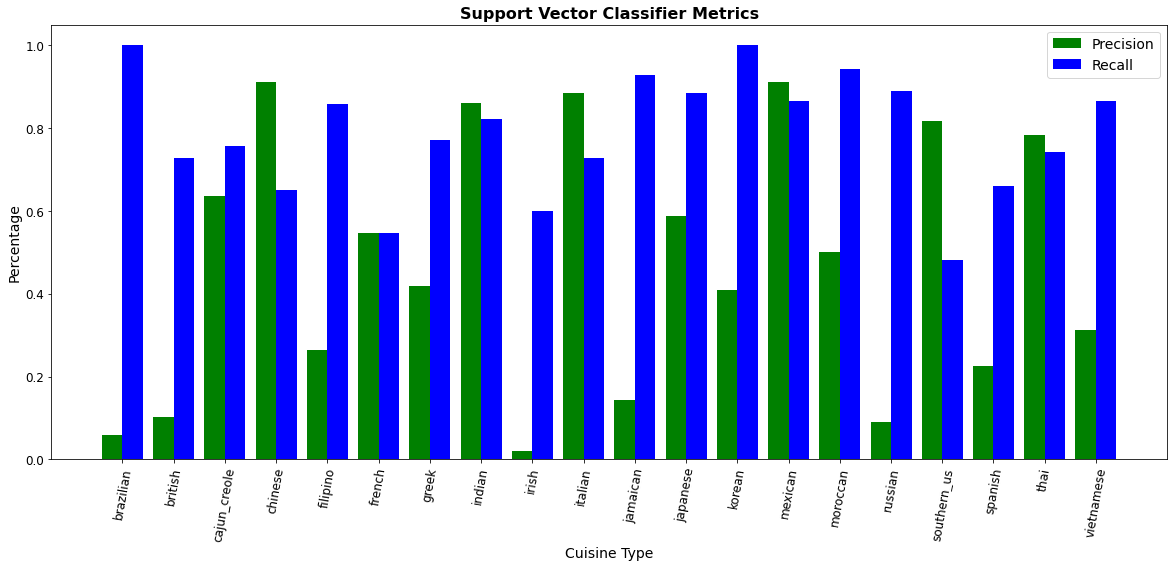

In [ ]:
# Set the width of the bar
barWidth = 0.4
fig = plt.subplots(figsize=(20, 8))

br1 = np.arange(20)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
plt.bar(br1, cr_df.iloc[0][:20], width=barWidth, color='g', label='Precision')
plt.bar(br2, cr_df.iloc[1][:20], width=barWidth, color='b', label='Recall')

plt.title('Support Vector Classifier Metrics', fontsize=16, fontweight='bold')
plt.xlabel('Cuisine Type', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(ticks=[r + barWidth/2 for r in range(20)],
           labels=cr_df.columns[:20], 
           fontsize=12, 
           rotation=80)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()

We can see that Bernoulli Naive Bayes performs worse than both random forest classifier and support vector classfier. Now, we will try a different feature engineering technique and train the models.